In [9]:
import os
import math
import random
import numpy as np
import pandas as pd
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [11]:
from pandas import concat
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [12]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

### SVAR Equation

Structural Var with p lags:
    
$$ \Gamma_0 Y_t = \delta + \Gamma_1 Y_{t-1} + \Gamma_2 Y_{t-2} + ... + \Gamma_p Y_{t-p} + u_t $$

Structural Var with p lags:
    
$$ Y_t = c + \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + ... + \Phi_p Y_{t-p} + \epsilon_t $$

Structural Var with p lags:
    
$$ 
\begin{bmatrix} 
\epsilon^{is}_{1,t} \\ \epsilon^{ps}_{1,t} \\ \epsilon^{gs}_{1,t} \\ 
\epsilon^{mss}_{1,t} \\ \epsilon^{irs}_{1,t} \\ \epsilon^{sms}_{1,t}
\end{bmatrix}
=
\begin{bmatrix} 
a(1) & 0 & 0 & 0 & 0 & 0  \\
a(2) & a(3) & 0 & 0 & 0 & 0  \\
a(4) & a(5) & a(6) & 0 & 0 & 0  \\
a(7) & a(8) & a(9) & a(10) & 0 & 0 \\
a(11) & a(12) & a(13) & a(14) & a(15) & 0 \\
a(16) & a(17) & a(18) & a(19) & a(20) & a(21) \\
\end{bmatrix}
x
\begin{bmatrix} 
\epsilon^{GDP}_{1,t} \\ \epsilon^{CPI}_{1,t} \\ \epsilon^{GOV}_{1,t} \\ 
\epsilon^{M1}_{1,t} \\ \epsilon^{FED}_{1,t} \\ \epsilon^{SP500}_{1,t}
\end{bmatrix}
$$

$$ \Phi_k = \Gamma_0^{-1}\Gamma_k , c = \Gamma_0^{-1}\delta, \epsilon_t = \Gamma_0^{-1} u_t $$

### Sources

https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618

https://towardsdatascience.com/predicting-fang-stock-prices-ecac4ddd27c1

### Ingest Data

In [ ]:
data = pd.read_excel(os.path.join("./Data/Monthly/","Combined Monthly Data.xlsx"),sheet_name='Combined')

In [ ]:
print(data)

    observation_date       M1      IGREA      CPI  Interbank_Loan   SP_500
0         1970-02-01    205.0  39.542355   38.100            8.58    89.50
1         1970-03-01    205.7  53.625587   38.300            8.08    89.63
2         1970-04-01    206.7  54.938801   38.500            7.51    81.52
3         1970-05-01    207.2  56.486121   38.600            8.08    76.55
4         1970-06-01    207.6  51.986694   38.800            8.07    72.72
..               ...      ...        ...      ...             ...      ...
615       2021-05-01  19197.1  63.836582  268.551            0.10  4204.11
616       2021-06-01  19243.8  61.983913  270.981            0.09  4297.50
617       2021-07-01  19407.5  70.049439  272.265            0.10  4395.26
618       2021-08-01  19682.4  85.375783  273.012            0.10  4522.68
619       2021-09-01  19862.2  99.341214  274.138            0.10  4307.54

[620 rows x 6 columns]


### Visualise Data

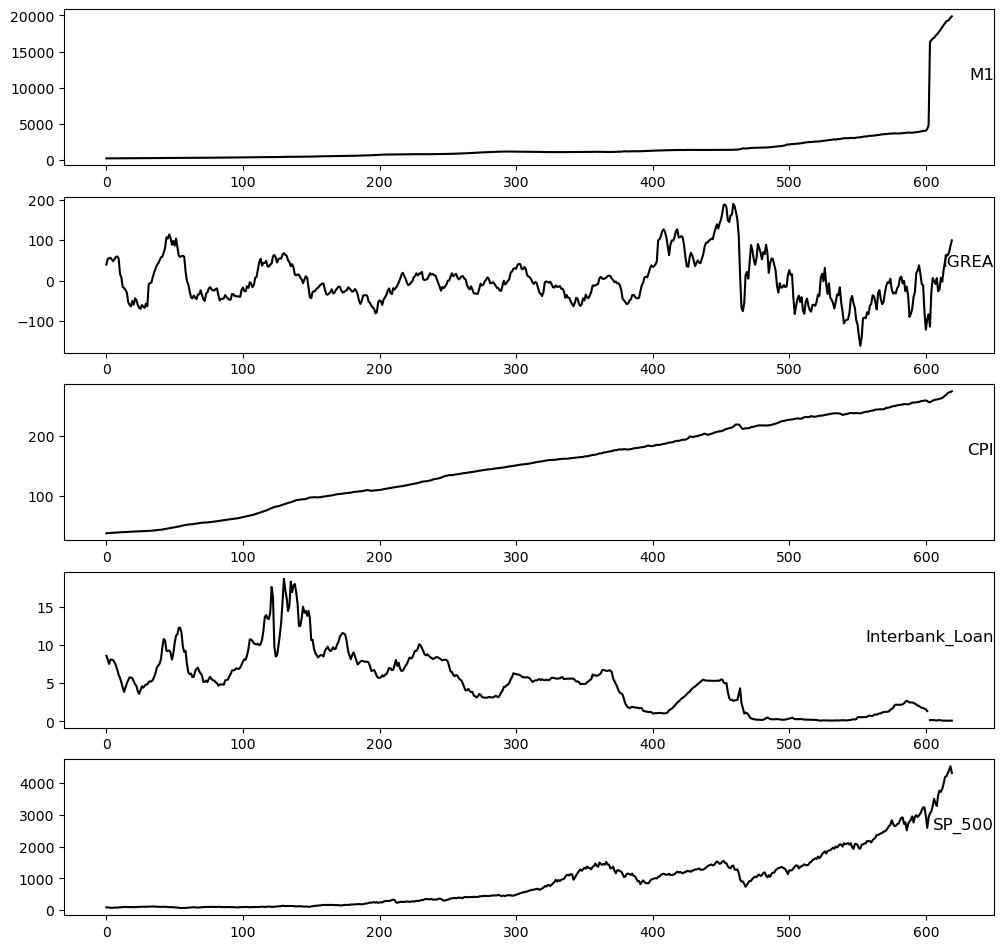

In [ ]:
values = data.values
# specify columns to plot
groups = [1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure(figsize=(12,12), dpi= 100, facecolor=None, edgecolor='k', clear=True)
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], color="black")
    plt.title(data.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

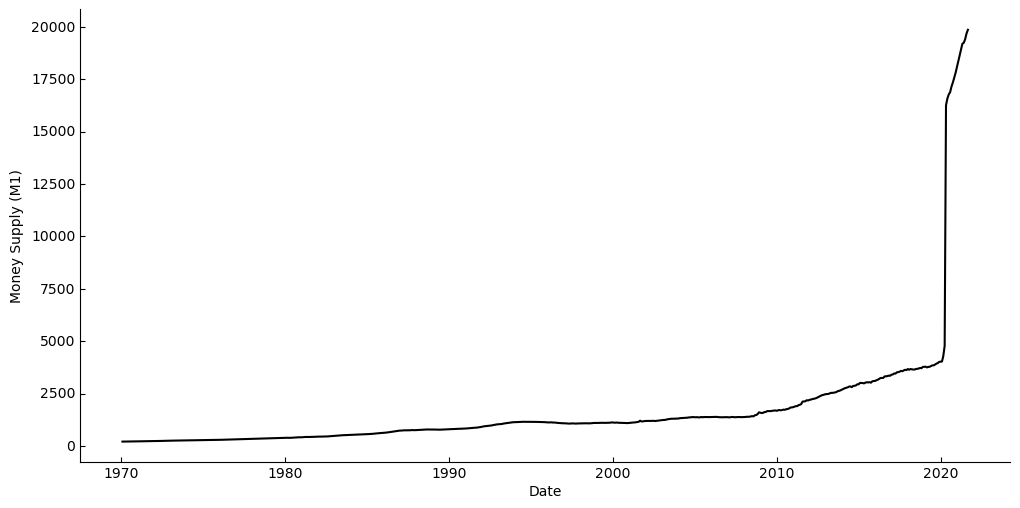

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Money Supply (M1)')
plt.plot(data.observation_date, data.M1, color="black")
plt.show()

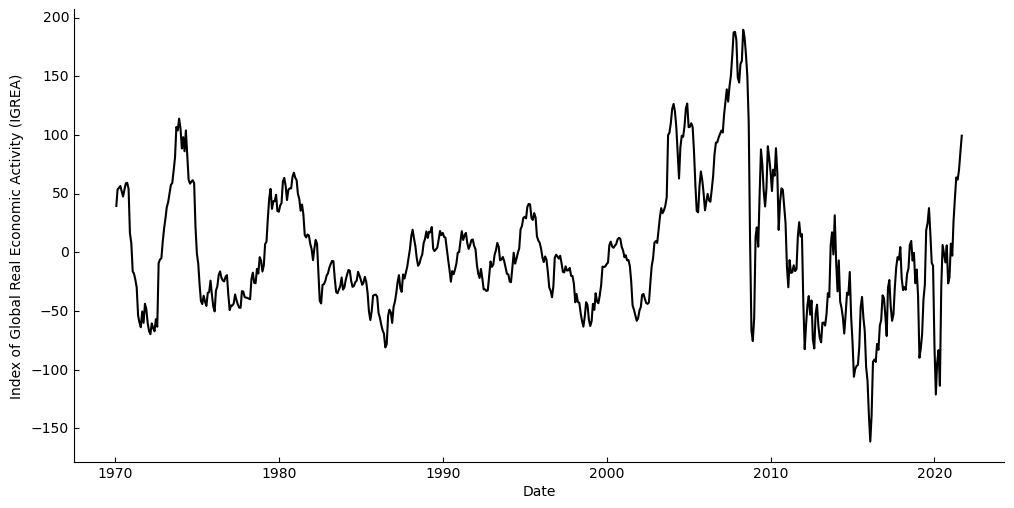

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Index of Global Real Economic Activity (IGREA)')
plt.plot(data.observation_date, data.IGREA, color="black")
plt.show()

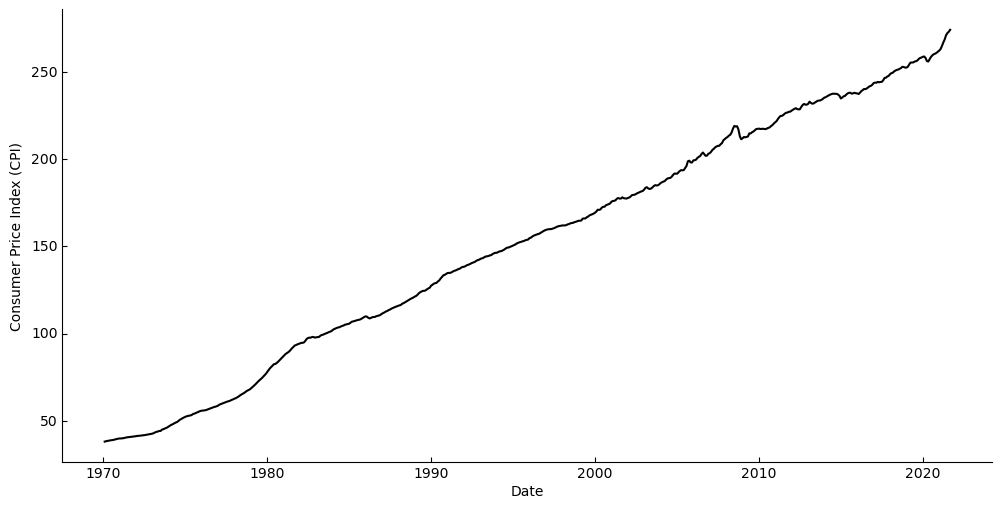

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.plot(data.observation_date, data.CPI, color="black")
plt.show()

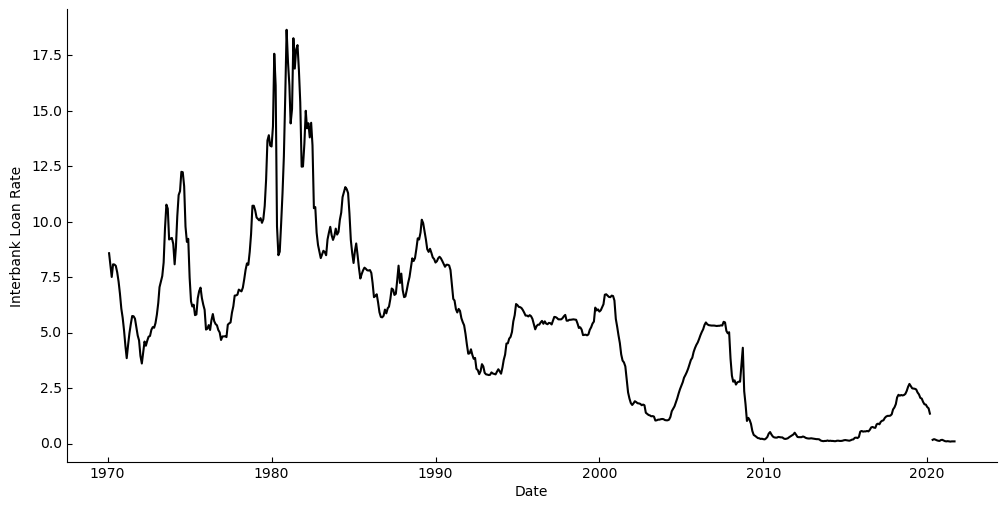

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Interbank Loan Rate')
plt.plot(data.observation_date, data.Interbank_Loan, color="black")
plt.show()

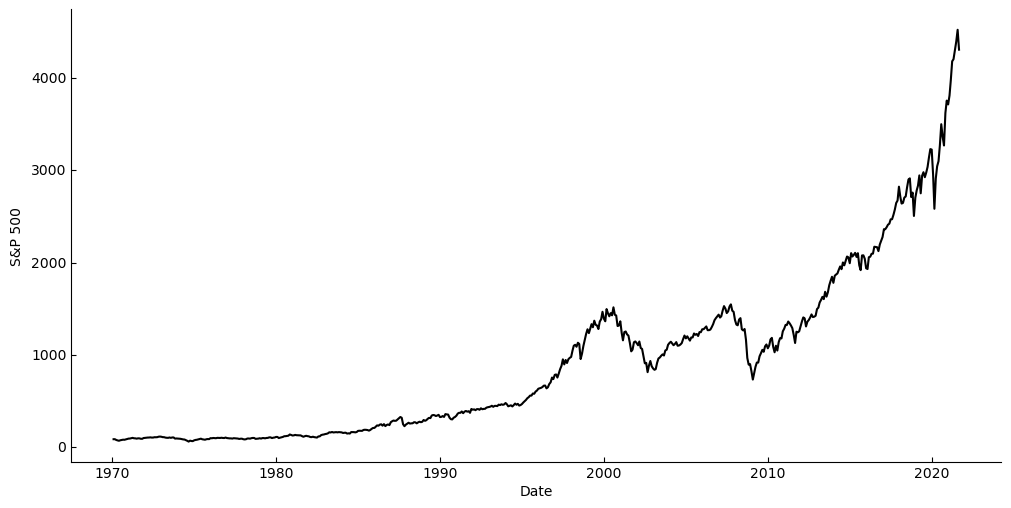

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('S&P 500')
plt.plot(data.observation_date, data.SP_500, color="black")
plt.show()

### LTSM Equation

$$ P^{s} = (P^s_t)_{t \in T} $$

$$ R^{m,s}_t = \frac {P^{s}_t} {P^{s}_{t-m}} -1 $$

$$ R^{m,s}_t = \frac {P^{s}_t} {P^{s}_{t-m}} -1 $$

#### LTSM Attempt 1

#### Sources 
https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# load dataset
data = pd.read_excel(os.path.join("./Data/Monthly/","Combined Monthly Data.xlsx"),sheet_name='Combined', header=0, index_col=0)
values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.000000   0.572276   0.000000   0.457435   0.042484  0.000036
2   0.000036   0.612433   0.000847   0.430496   0.044118  0.000086
3   0.000086   0.616177   0.001695   0.399785   0.016340  0.000112
4   0.000112   0.620589   0.002118   0.430496   0.009804  0.000132
5   0.000132   0.607760   0.002966   0.429957   0.006536  0.000153


In [ ]:
# split into train and test sets
values = reframed.values
n_train_quarters = 4
train = values[:n_train_quarters, :]
test = values[n_train_quarters:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4, 1, 5) (4,) (613, 1, 5) (613,)


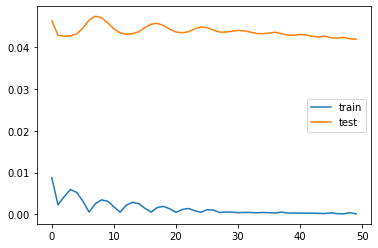

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2851.738


#### LTSM Attempt 2

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Attention
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

import datetime

In [ ]:
df = pd.read_excel(os.path.join("./Data/Monthly/","Combined Monthly Data.xlsx"),sheet_name='Combined', header=0, index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620 entries, 1970-02-01 to 2021-09-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   M1              620 non-null    float64
 1   IGREA           620 non-null    float64
 2   CPI             620 non-null    float64
 3   Interbank_Loan  619 non-null    float64
 4   SP_500          620 non-null    float64
dtypes: float64(5)
memory usage: 29.1 KB


In [ ]:
df.describe() 

,M1,IGREA,CPI,Interbank_Loan,SP_500
count,620.000000,620.000000,620.000000,619.000000,620.000000
mean,1705.434194,0.509759,151.624266,5.123037,917.598258
std,2929.786151,54.885696,68.116560,3.848891,908.639678
min,205.000000,-161.159110,38.100000,0.090000,63.540000
25%,476.600000,-35.859333,98.000000,1.760000,144.135000
50%,1094.550000,-8.930864,153.800000,5.310000,610.650000
75%,1484.000000,29.416091,213.571500,7.385000,1326.177500
max,19862.200000,189.548150,274.138000,18.650000,4522.680000


In [ ]:
df.head(10)

,M1,IGREA,CPI,Interbank_Loan,SP_500
observation_date,,,,,
1970-02-01,205.0,39.542355,38.1,8.58,89.50
1970-03-01,205.7,53.625587,38.3,8.08,89.63
1970-04-01,206.7,54.938801,38.5,7.51,81.52
1970-05-01,207.2,56.486121,38.6,8.08,76.55
1970-06-01,207.6,51.986694,38.8,8.07,72.72
1970-07-01,208.0,47.566956,38.9,8.01,78.05
1970-08-01,209.9,53.487952,39.0,7.72,81.52
1970-09-01,211.8,58.813319,39.2,7.30,84.30
1970-10-01,212.9,59.256073,39.4,6.76,83.25


M1


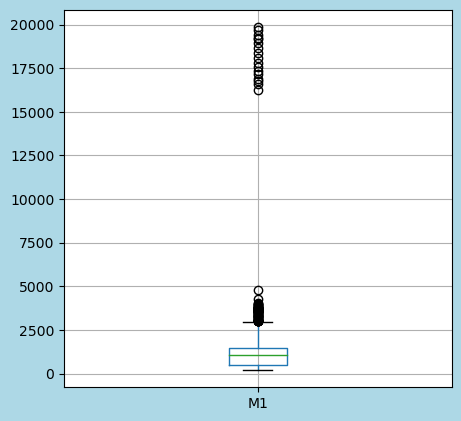

IGREA


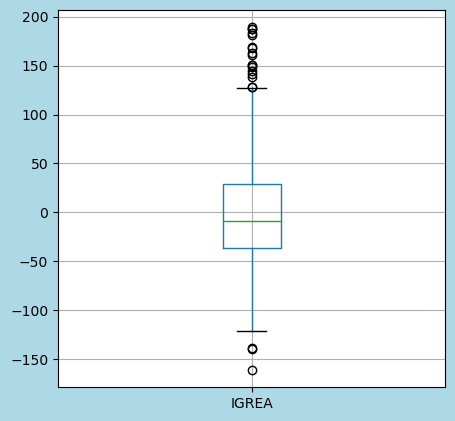

CPI


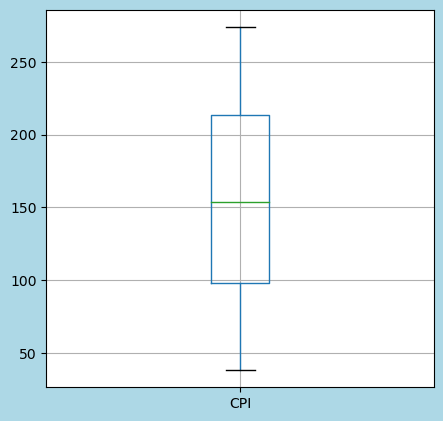

Interbank_Loan


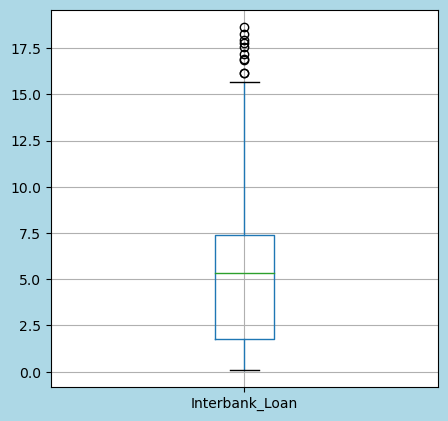

SP_500


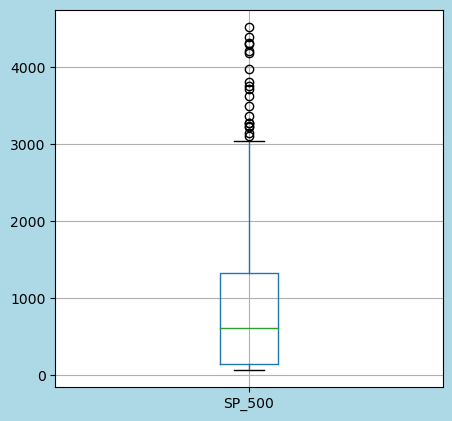

In [ ]:
columns = list(df)

for col in columns:
    print(col)
    plt.figure(figsize=(5,5), dpi= 100, facecolor='lightblue', edgecolor='k')
    df.boxplot(column=col)
    plt.show()

In [ ]:
train_split = 0.8
test_split = 0.2

training_data_count = round(len(df)*train_split)
print("Train count: " + str(training_data_count))

test_data_count = len(df) - training_data_count
print("Test count: " + str(test_data_count))

print(f"Test Percentage:  {str(round(test_data_count/(training_data_count+test_data_count)*100))}%")

Train count: 496
Test count: 124
Test Percentage:  20%


#### Data Cleansing

In [ ]:
print("Number of missing data points for each field")
df.isna().sum()

Number of missing data points for each field


M1                0
IGREA             0
CPI               0
Interbank_Loan    1
SP_500            0
dtype: int64

In [ ]:
print("Percentage of missing data")
df.isna().sum()*100/len(df)

Percentage of missing data


M1                0.00000
IGREA             0.00000
CPI               0.00000
Interbank_Loan    0.16129
SP_500            0.00000
dtype: float64

In [ ]:
df = df.interpolate(method="time")

print("Missing values after interpolate")
df.isna().sum()

Missing values after interpolate


M1                0
IGREA             0
CPI               0
Interbank_Loan    0
SP_500            0
dtype: int64

#### Split Training & Test Data

In [ ]:
features = ['M1', 'IGREA', 'CPI', 'Interbank_Loan']
target = ['SP_500']

In [ ]:
df['Stock-Period_Ahead'] = df['SP_500'].shift(periods=-1)

In [ ]:
train_set = df.iloc[:training_data_count+1]
train_set = train_set[:-1]

test_set = df.iloc[-test_data_count:]
test_set = test_set.dropna()

In [ ]:
def scale(df):
    """
    Applies Min Max Scaling transformation to dataset and splits data between features and target.

    Parameters
    ----------
    df : DataFrame
        Dataset to be transformed (Data should be split between training and test before transformation)

    Returns
    -------
    X : DataFrame
        X data (features)
    y : DataFrame
        y data (target)
    """
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

    feature_scaler = scaler.fit(df[features])
    feature_transform = scaler.fit_transform(df[features])
    feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)

    target_scaler = scaler.fit(np.array(df[target]).reshape(-1, 1))
    target_transform = scaler.fit_transform(df[target])
    target_transform= pd.DataFrame(columns=target, data=target_transform, index=df.index)

    X = feature_transform
    y = target_transform
    
    return X, y, target_scaler

In [ ]:
X_train, y_train, train_scaler = scale(train_set)

In [ ]:
X_test, y_test, test_scaler = scale(test_set)

In [ ]:
 # Convert to np array for modelling:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# LSTM model architecture:
model = Sequential()
model.add(LSTM(100, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#Create Early stoping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [ ]:
# Fit Model
history = model.fit(X_train, y_train, 
                   epochs=1000, batch_size=128, 
                   validation_data=(X_test, y_test), 
                   verbose=1, shuffle=False,
                   callbacks=[early_stop])

Epoch 1/1000
4/4 [==============================] - 0s 123ms/step - loss: 0.2181 - val_loss: 0.1767
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2056 - val_loss: 0.1651
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1939 - val_loss: 0.1540
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1828 - val_loss: 0.1434
Epoch 5/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1723 - val_loss: 0.1334
Epoch 6/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1624 - val_loss: 0.1239
Epoch 7/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1531 - val_loss: 0.1148
Epoch 8/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1442 - val_loss: 0.1061
Epoch 9/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1356 - val_loss: 0.0978
Epoch 10/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1274 - val_loss: 0.0898
Epoch 11

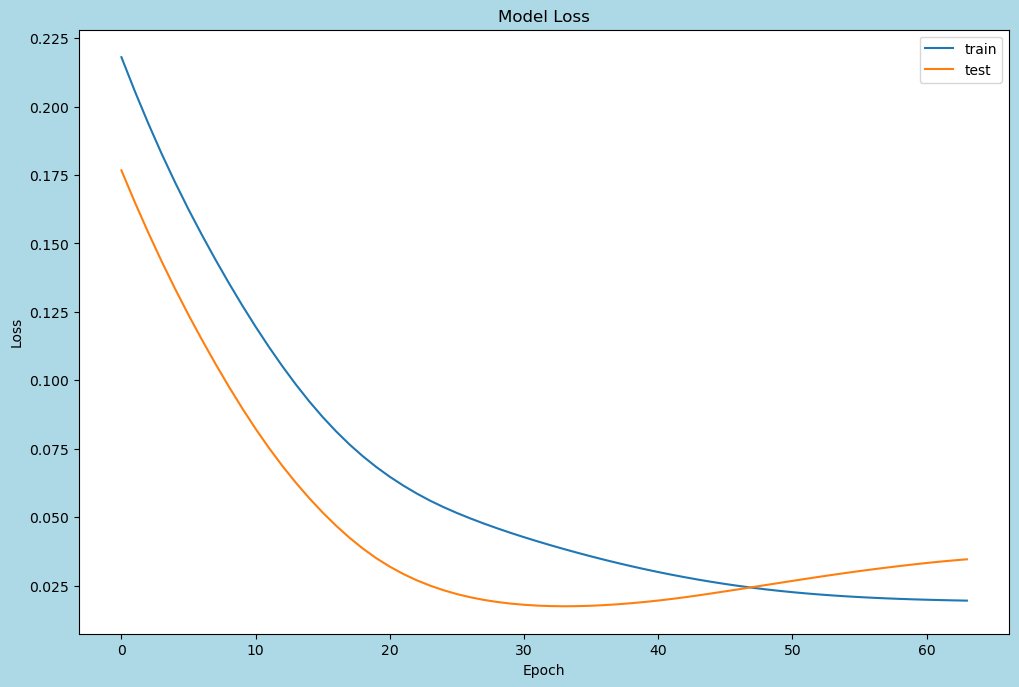

In [ ]:
#Plot Loss
plt.figure(figsize=(12,8), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Test

In [ ]:
# Price prediction:
y_pred = model.predict(X_test)

In [ ]:
predictions = pd.DataFrame(y_pred, index = y_test.index)

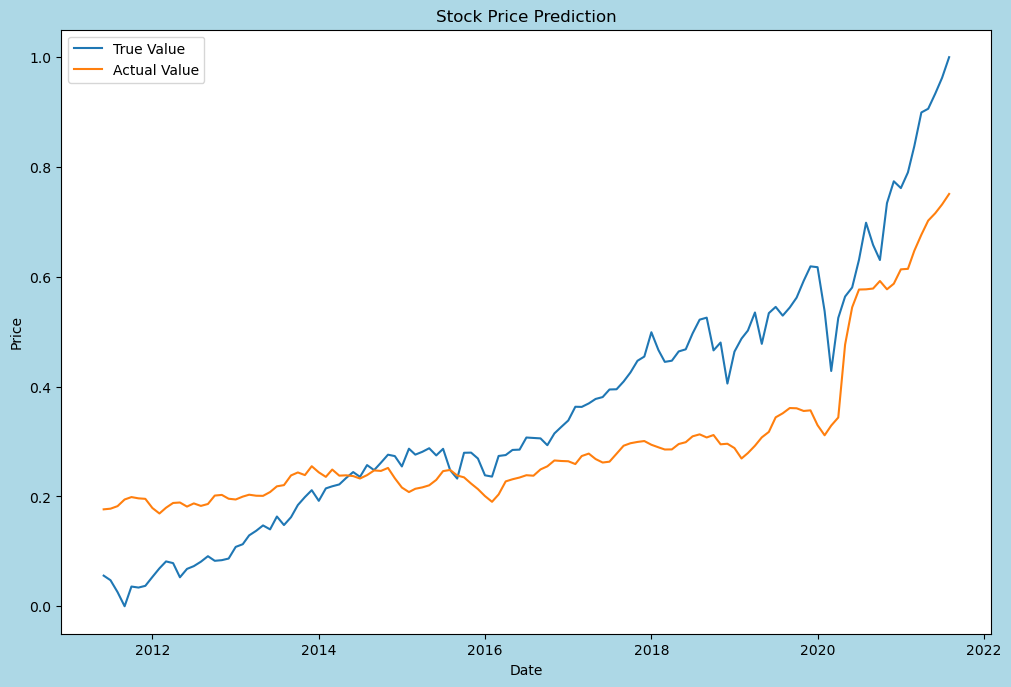

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.plot(y_test, label='True Value')
plt.plot(predictions, label='Actual Value')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
print("------------------------------------------------------")
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("------------------------------------------------------")
print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("------------------------------------------------------")
print("R2 Score: " + str(r2_score(y_test, predictions)))
print("------------------------------------------------------")

------------------------------------------------------
MSE: 0.017431421476198288
------------------------------------------------------
MAE: 0.11251014694477299
------------------------------------------------------
R2 Score: 0.6605416642221873
------------------------------------------------------


In [ ]:
predicted_price = test_scaler.inverse_transform(predictions)
actual_price = test_scaler.inverse_transform(y_test)

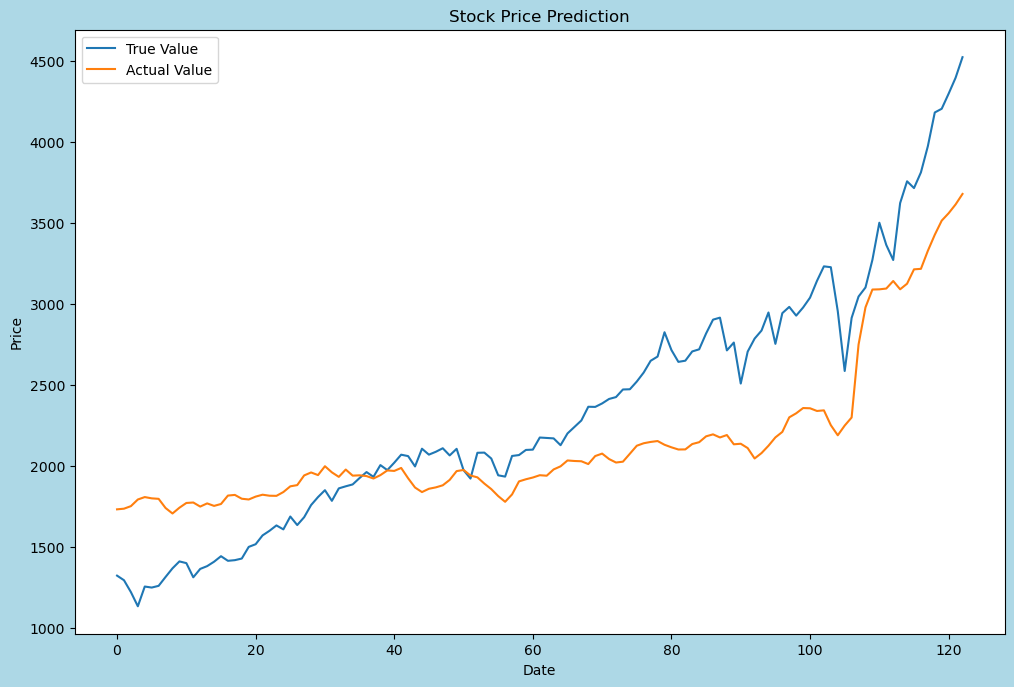

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.plot(actual_price, label='True Value')
plt.plot(predicted_price, label='Actual Value')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
print("------------------------------------------------------")
print("MSE: " + str(mean_squared_error(actual_price, predicted_price)))
print("------------------------------------------------------")
print("MAE: " + str(mean_absolute_error(actual_price, predicted_price)))
print("------------------------------------------------------")
print("R2 Score: " + str(r2_score(actual_price, predicted_price)))
print("------------------------------------------------------")

------------------------------------------------------
MSE: 200472.55176700835
------------------------------------------------------
MAE: 381.551133169779
------------------------------------------------------
R2 Score: 0.6605417112975653
------------------------------------------------------


In [5]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Dissertation/Monthly_Analysis.ipynb')
27